
=== Statistical Analysis Results by Advertising Media ===
        TV radio newspaper sales                      
                            mean std count   min   max
0      0.7  39.6       8.7   1.6 NaN     1   1.6   1.6
1      4.1  11.6       5.7   3.2 NaN     1   3.2   3.2
2      5.4  29.9       9.4   5.3 NaN     1   5.3   5.3
3      7.3  28.1      41.4   5.5 NaN     1   5.5   5.5
4      7.8  38.9      50.6   6.6 NaN     1   6.6   6.6
..     ...   ...       ...   ...  ..   ...   ...   ...
195  289.7  42.3      51.2  25.4 NaN     1  25.4  25.4
196  290.7   4.1       8.5  12.8 NaN     1  12.8  12.8
197  292.9  28.3      43.2  21.4 NaN     1  21.4  21.4
198  293.6  27.7       1.8  20.7 NaN     1  20.7  20.7
199  296.4  36.3     100.9  23.8 NaN     1  23.8  23.8

[200 rows x 8 columns]


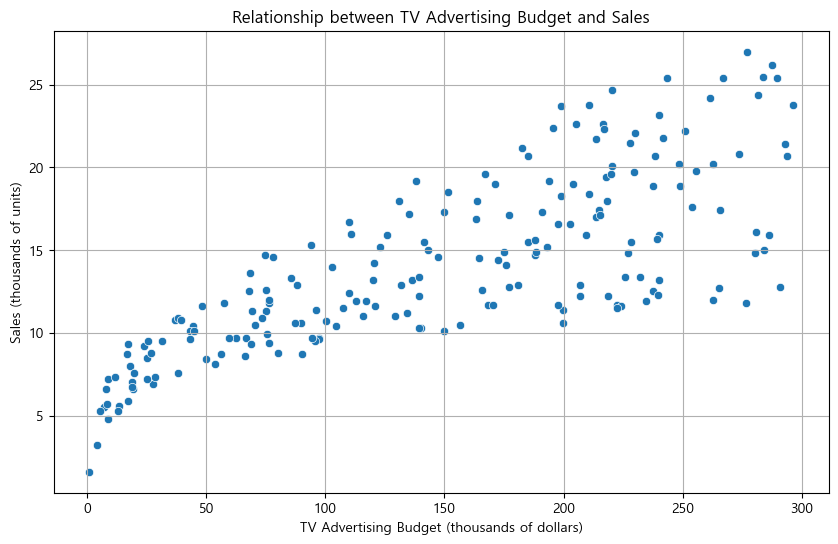

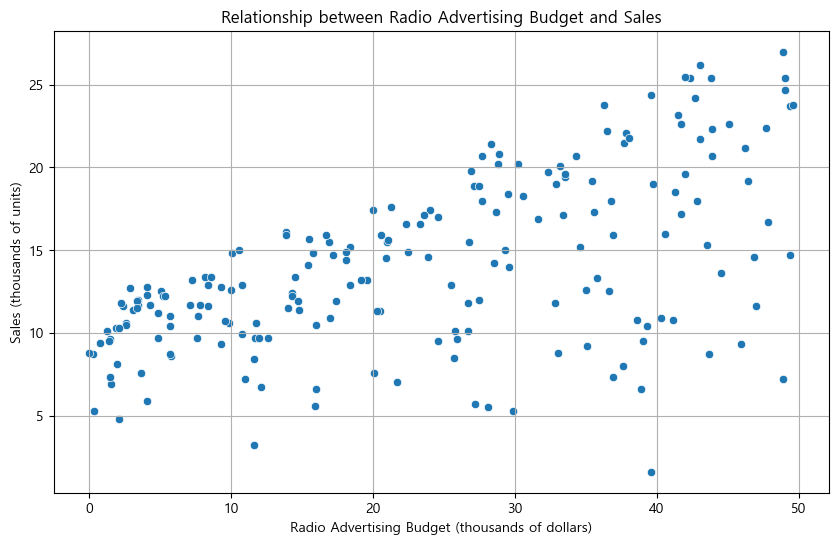

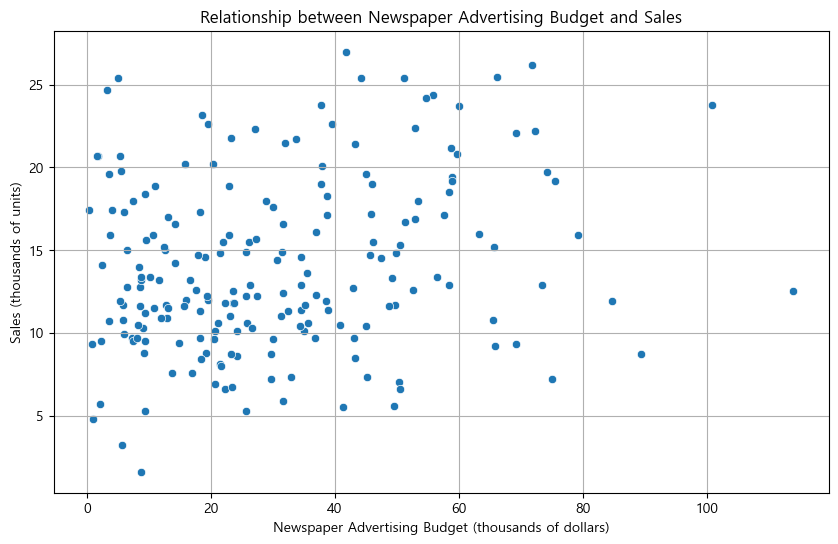

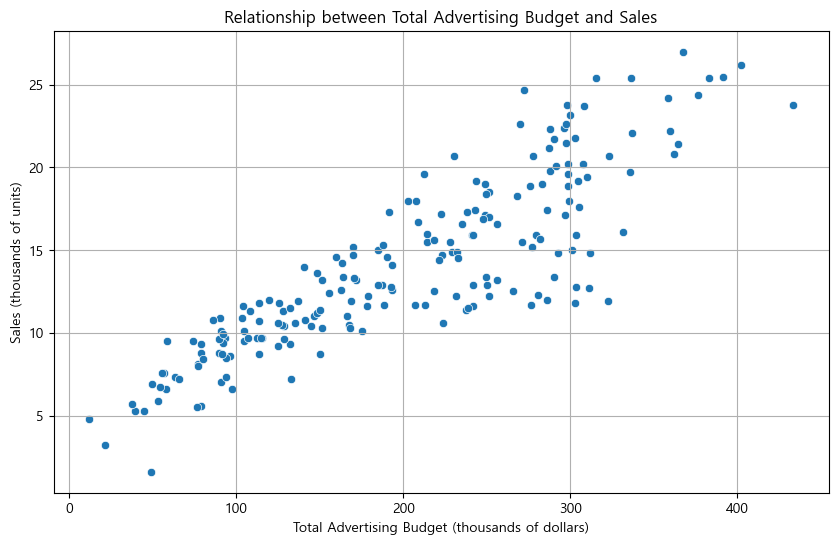


=== Model Evaluation Results ===
MSE (Mean Squared Error): 3.1741
R2 Score (Coefficient of Determination): 0.8994


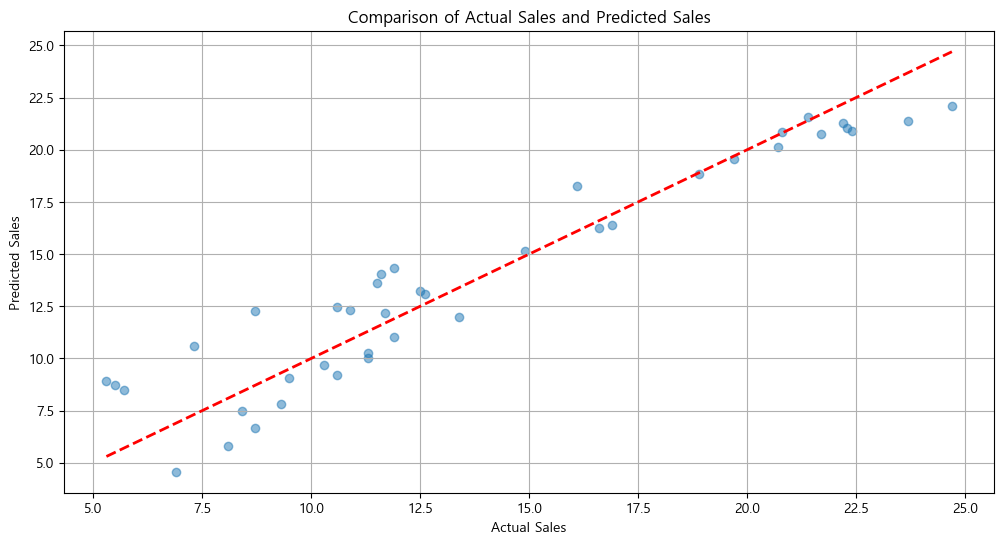

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load data
df = pd.read_csv('Advertising.csv')

# 2. Grouping
grouped_stats = df.groupby(['TV', 'radio', 'newspaper']).agg({
    'sales': ['mean', 'std', 'count', 'min', 'max']
}).reset_index()

print("\n=== Statistical Analysis Results by Advertising Media ===")
print(grouped_stats)

# 3. Graph
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TV', y='sales')
plt.title('Relationship between TV Advertising Budget and Sales')
plt.xlabel('TV Advertising Budget (thousands of dollars)')
plt.ylabel('Sales (thousands of units)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='radio', y='sales')
plt.title('Relationship between Radio Advertising Budget and Sales')
plt.xlabel('Radio Advertising Budget (thousands of dollars)')
plt.ylabel('Sales (thousands of units)')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='newspaper', y='sales')
plt.title('Relationship between Newspaper Advertising Budget and Sales')
plt.xlabel('Newspaper Advertising Budget (thousands of dollars)')
plt.ylabel('Sales (thousands of units)')
plt.grid(True)
plt.show()

df['Total Advertising'] = df['TV'] + df['radio'] + df['newspaper']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Total Advertising', y='sales')
plt.title('Relationship between Total Advertising Budget and Sales')
plt.xlabel('Total Advertising Budget (thousands of dollars)')
plt.ylabel('Sales (thousands of units)')
plt.grid(True)
plt.show()

# 4. Machine Learning
X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n=== Model Evaluation Results ===")
print(f'MSE (Mean Squared Error): {mse:.4f}')
print(f'R2 Score (Coefficient of Determination): {r2:.4f}')

plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Comparison of Actual Sales and Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.grid(True)
plt.show()

In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.optimize import minimize

# 1. 데이터 로드
data = pd.read_csv('Advertising.csv')

# 2. 결측치 확인
print("=== 결측치 확인 ===")
print(data.isnull().sum())

# 3. 결측치 처리 (예: 결측치가 있는 행 제거)
data = data.dropna()  # 결측치가 있는 행 제거
# 또는 data.fillna(data.mean(), inplace=True)  # 평균값으로 대체 가능

# 4. 모델 학습
X = data[['TV', 'radio', 'newspaper']]
y = data['sales']

model = LinearRegression()
model.fit(X, y)

# 5. 예산 배분 최적화 함수 정의
def objective_function(budgets):
    # budgets: [TV_budget, radio_budget, newspaper_budget]
    total_advertising = sum(budgets)
    if total_advertising > total_budget:
        return np.inf  # 예산 초과 시 무한대 반환
    predicted_sales = model.predict(np.array([budgets]).reshape(1, -1))
    return -predicted_sales[0]  # 최대 판매량을 최소화 문제로 변환

# 6. 초기 예산 설정
total_budget = 100000  # 총 예산 (예: 100,000 달러)
initial_budgets = [total_budget / 3] * 3  # 초기 예산을 균등하게 배분

# 7. 제약 조건 설정
constraints = ({'type': 'eq', 'fun': lambda x: sum(x) - total_budget})  # 총 예산 제약

# 8. 최적화 수행
result = minimize(objective_function, initial_budgets, constraints=constraints)

# 9. 결과 출력
optimized_budgets = result.x
predicted_sales = model.predict(np.array([optimized_budgets]).reshape(1, -1))

print("Optimized Budgets:")
print(f"TV: ${optimized_budgets[0]:.2f}, Radio: ${optimized_budgets[1]:.2f}, Newspaper: ${optimized_budgets[2]:.2f}")
print(f"Predicted Sales: ${predicted_sales[0]:.2f}")

=== 결측치 확인 ===
TV           0
radio        0
newspaper    0
sales        0
dtype: int64


c:\Users\PC\anaconda3\envs\pyenv3123\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\PC\anaconda3\envs\pyenv3123\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values